In [2]:
#imports
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB


In [3]:
# df = pd.read_csv('bug_data.csv')
df = pd.read_csv('bug_data.csv')
df.head()

,id,description,severity
0,91,document properties cannot be listed,major
1,103,layout bug: table cell overflows containing cell,normal
2,104,table saved as text: missing inter-column space,minor
3,105,nested <TABLE>s: bgcolor of inner table not re...,normal
4,133,Navigator draws entities like &lt;&amp;&gt; as...,minor


In [4]:
df.shape

(394660, 3)

In [6]:
df.severity.value_counts()

normal         272522
major           35899
critical        31953
enhancement     23424
minor           19451
trivial          7716
blocker          3694
Name: severity, dtype: int64

In [28]:
# #remove enhancement
# df = df[df.severity!= "enhancement"]
df = df[df.severity!= 'normal']

# df.severity.value_counts()

In [29]:
# from sklearn.utils import resample
# normal =df[df.severity=='normal']
# major =df[df.severity=='major']
# minor =df[df.severity=='minor']
# blocker =df[df.severity=='blocker']
# trivial =df[df.severity=='trivial']
# critical =df[df.severity=='critical']
# enhancement =df[df.severity=='enhancement']

# def resample_df(df):
#     return resample(df,replace=True,n_samples=272522)

# normal =resample_df(normal)
# major =resample_df(major)
# minor =resample_df(minor)
# blocker =resample_df(blocker)
# trivial =resample_df(trivial)
# critical =resample_df(critical)
# enhancement =resample_df(enhancement)

# df = pd.concat([major,critical,minor,blocker])


# df.severity.value_counts()


In [30]:
#text preprocessing before using vectorization
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download if not already present
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /home/pratik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/pratik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pratik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [356]:

def preprocess_text(text):
    """
    Tokenize, remove stopwords, and lemmatize text.
    """
    # Tokenize text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Rejoin lemmatized tokens into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

In [357]:
 # %time df['description'] = df['description'].apply(preprocess_text)

In [31]:
df.head()
df.dropna(inplace=True)

In [32]:
#define x as bug description and y as the severity
x = df.description
y = df.severity
# print(x)
# print(y)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)


In [34]:
#instantiate the vectorizer
vect = CountVectorizer()

In [35]:
vect.fit(x_train)
x_train_dtm = vect.transform(x_train)
tfidf_transformer = TfidfTransformer()
# x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)

In [36]:
x_test_dtm = vect.transform(x_test)
# x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()



In [38]:
%time nb.fit(x_train_dtm, y_train)



CPU times: user 387 ms, sys: 0 ns, total: 387 ms
Wall time: 391 ms


MultinomialNB()

In [39]:
y_pred_class = nb.predict(x_test_dtm)

In [40]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.5836164899496459

In [41]:
class_counts = nb.class_count_
print(class_counts)
label_order = nb.classes_
print(label_order)



[ 2952. 25549. 18833. 28613. 15580.  6181.]
['blocker' 'critical' 'enhancement' 'major' 'minor' 'trivial']


In [42]:
y_pred_class_train = nb.predict(x_train_dtm)
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred_class_train)

0.6496090391779589

In [43]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_class)
conf_mat



array([[  80,  198,   66,  365,   31,    2],
       [   9, 4443,  170, 1634,  145,    3],
       [   7,  111, 3365,  686,  388,   33],
       [  13, 1011,  510, 4949,  780,   22],
       [   4,  204,  628, 1682, 1274,   79],
       [   1,   62,  283,  454,  590,  145]])

In [44]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = nb.classes_)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['normal','minor','major','critical'])

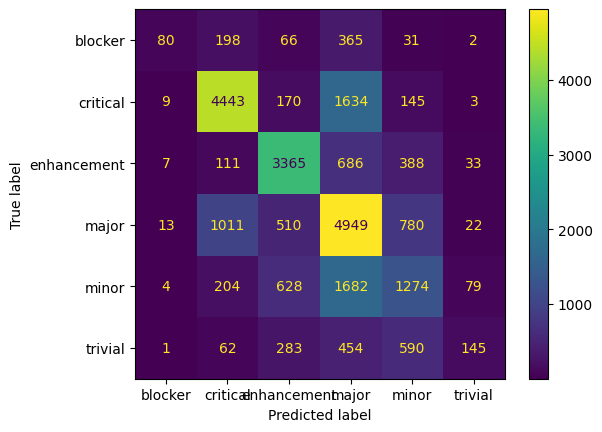

In [45]:
cm_display.plot()
plt.show()


In [46]:
from sklearn.metrics import classification_report

# assuming conf_mat is your multi-class confusion matrix
# target_names = ['minor', 'major', 'critical', 'blocker']
target_names = nb.classes_
print(classification_report(y_test, y_pred_class, target_names=target_names))


              precision    recall  f1-score   support

     blocker       0.70      0.11      0.19       742
    critical       0.74      0.69      0.71      6404
 enhancement       0.67      0.73      0.70      4590
       major       0.51      0.68      0.58      7285
       minor       0.40      0.33      0.36      3871
     trivial       0.51      0.09      0.16      1535

    accuracy                           0.58     24427
   macro avg       0.59      0.44      0.45     24427
weighted avg       0.59      0.58      0.56     24427



In [47]:
#testing for one
%time ip = ["fails to launch"]
ip_dtm = vect.transform(ip)
# ip_tfidf = tfidf_transformer.transform(ip_dtm)
nb.predict(ip_dtm)[0]

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


'major'

In [34]:
#pikcle the model and put into the jar
import pickle
pickle.dump(nb, open('pickle_jar/naive_bayes_model.pkl', 'wb'))
pickle.dump(vect, open('pickle_jar/naive_bayes_vect.pkl', 'wb'))

